In [1]:
#meta 5/30/2023 HOW TO GCP - BigQuery 

#References
#Using BigQuery with Python
# refer to https://codelabs.developers.google.com/codelabs/cloud-bigquery-python#6

#my
# refer to project HackTime_20xx `gcp_howto_bq_query.ipynb`

# Using BigQuery with Python

## 0. Example w/ Public Dataset
Src: refer to https://codelabs.developers.google.com/codelabs/cloud-bigquery-python#6

## 7. Query the works of Shakespeare
A public dataset is any dataset that's stored in BigQuery and made available to the general public. There are many other public datasets available for you to query. While some datasets are hosted by Google, most are hosted by third parties. For more info see the [Public Datasets](https://cloud.google.com/bigquery/public-data/) page.

In addition to public datasets, BigQuery provides a limited number of [sample tables](https://cloud.google.com/bigquery/public-data#sample_tables) that you can query. These tables are contained in the `bigquery-public-data:samples` dataset. The `shakespeare` table in the `samples` dataset contains a word index of the works of Shakespeare. It gives the number of times each word appears in each corpus.

In this step, you will query the `shakespeare` table.

In [2]:
from google.cloud import bigquery

client = bigquery.Client()

query = """
    SELECT corpus AS title, COUNT(word) AS unique_words
    FROM `bigquery-public-data.samples.shakespeare`
    GROUP BY title
    ORDER BY unique_words
    DESC LIMIT 10
"""
results = client.query(query)

for row in results:
    title = row['title']
    unique_words = row['unique_words']
    print(f'{title:<20} | {unique_words}')

hamlet               | 5318
kinghenryv           | 5104
cymbeline            | 4875
troilusandcressida   | 4795
kinglear             | 4784
kingrichardiii       | 4713
2kinghenryvi         | 4683
coriolanus           | 4653
2kinghenryiv         | 4605
antonyandcleopatra   | 4582


## 1. Examples w/ Public Dataset(s)
Sample chunks  
Src: refer to project HackTime_20xx `gcp_howto_bq_query.ipynb`

BQ reference: Query syntax  
refer to https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax

### 1.2 BQ Query Inline
Visualizing BigQuery data in a Jupyter notebook  
refer to https://cloud.google.com/bigquery/docs/visualize-jupyter

In [3]:
%%bigquery
SELECT COUNT(*) FROM `bigquery-public-data`.samples.shakespeare

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.26s/rows]


,f0_
0,164656


In [4]:
%%bigquery
SELECT * FROM `bigquery-public-data`.samples.shakespeare LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.30rows/s]


,word,word_count,corpus,corpus_date
0,LVII,1,sonnets,0
1,augurs,1,sonnets,0
2,dimm'd,1,sonnets,0
3,plagues,1,sonnets,0
4,treason,1,sonnets,0


In [5]:
%%bigquery
SELECT corpus, COUNT(corpus) as COUNTS FROM `bigquery-public-data`.samples.shakespeare GROUP BY corpus LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  8.85rows/s]


,corpus,COUNTS
0,sonnets,3677
1,various,1349
2,1kinghenryvi,4441
3,2kinghenryvi,4683
4,3kinghenryvi,4076
5,comedyoferrors,2870
6,kingrichardiii,4713
7,titusandronicus,3869
8,tamingoftheshrew,3699
9,loveslabourslost,4236


In [6]:
%%bigquery example
SELECT corpus, COUNT(corpus) as COUNTS FROM `bigquery-public-data`.samples.shakespeare GROUP BY corpus LIMIT 10

Downloading: 100%|██████████| 10/10 [00:00<00:00, 10.22rows/s]


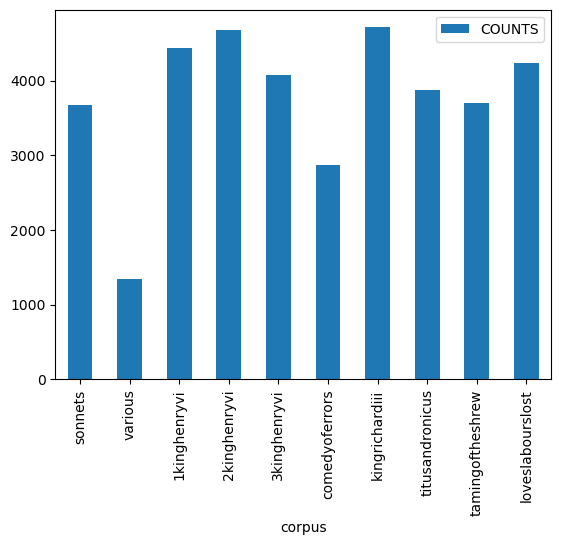

In [7]:
example.plot(kind="bar", x="corpus", y="COUNTS");

### 1.3 Another Vis Example
Refer to https://cloud.google.com/bigquery/docs/visualize-jupyter

In [8]:
%%bigquery
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.77rows/s]


,wday,male_births,female_births
0,1,4293575,4093357
1,2,6095840,5831111
2,3,6727217,6412155
3,4,6618729,6307782
4,5,6583015,6284434
5,6,6518636,6223584
6,7,4761950,4530052


In [9]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

Downloading: 100%|██████████| 7/7 [00:00<00:00,  7.41rows/s]


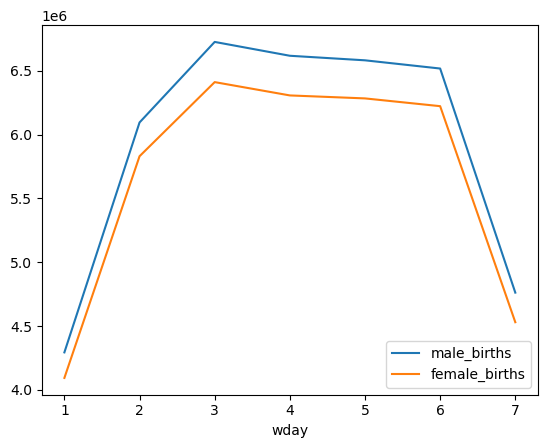

In [10]:
births_by_weekday.plot(x="wday");

In [11]:
mystop

NameError: name 'mystop' is not defined

## 2. Our Dataset
Sample code  (won't run without a real project  
Src: refer to project HackTime_20xx `gcp_howto_bq_query.ipynb` 

Preloaded table `project:ds_name.t_name`

In [ ]:
# DEFAULT TO CURRENT PROJECT_ID
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}

if PROJECT_ID == "" or PROJECT_ID is None or PROJECT_ID == "[your-project-id]":
    # Get your GCP project id from gcloud
    shell_output = ! gcloud config list --format 'value(core.project)' 2>/dev/null
    PROJECT_ID = shell_output[0]
    print("Project ID:", PROJECT_ID)


In [ ]:
DATASET_NAME = 'ds_name'
TABLE_NAME = f'{DATASET_NAME}.t_name'
DATASET_URI = f'`{PROJECT_ID}`.{TABLE_NAME}' #$acdelta was f'{PROJECT_ID}:{TABLE_NAME}'
DATASET_URI

In [ ]:
#ensured the qry worked before removing real project 
%%bigquery
SELECT * FROM `project_name`.ds_name.dt_name LIMIT 10

## Xtra

### 1.1 BQ Query with CLI
Using the bq command-line tool  
refer to https://cloud.google.com/bigquery/docs/bq-command-line-tool

Previously worked in another project, something has changed  
- run in GCP, project: hacktime-year22  
- infra: XXX GCP VertexAI managed-notebook-hack##  
- env [prebuilt] Python (local): Python 3.7.12  
- numpy 1.19.5, pandas 1.3.5, matplotlib 3.5.2  

In [ ]:
! bq query --use_legacy_sql=false \
'SELECT COUNT(*) FROM `bigquery-public-data`.samples.shakespeare'

In [ ]:
# VIEW BQ DATASET:`
! bq ls --format prettyjson $DATASET_NAME